<a href="https://colab.research.google.com/github/marlonmalmeida/deepprojetos/blob/main/Credit_card_defaut_analysis_using_machine_and_neural_networks_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FGV EPGE - Escola de Pós-graduação em Economia**
==
**Trabalho da Disciplina Deep Learning**
==
Professores: Renato Rocha Souza

**Tema: Predição de Default com Técnicas de Machine Learning e Deep**
==
Alunos: Marlon Marques Almeida e Rodrigo Ferreira Saraiva da Fonseca

Data: 31/01/2021



#Objetivo

O objetivo deste trabalho é apresentar e comparar algumas técnicas de machine learning para classificação supervisionada.

Será utilizada uma base com dados socio-econômicos para predição da probabilidade de default de cartão de crédito.

As instituições financeiras tem como base do seu negócio captação de recursos para aplicação dos mesmos aos tomadores. Esse ciclo econônico é de extrema importância para atividade econômica. No entanto, quando temos alto grau de inadimplência, esse ciclo pode ficar comprometido, impactando toda economia. 

As instituições financeiras têm investido cada vez mais em análise de dados e modelos para predição de propabilidade de defaut, buscando redução dessa indadimplência. Com o advento do Open Banking no Brasil, a minimização da ocorrência de defaults torna-se ainda mais importante para manutenção e crescimento de uma instiuição. 

No trabalho, utilizamos uma base de dados da American Express de usuários dos EUA objetivando uma classificação da probabilidade de default.

A título de curiosidade, abaixo colocamos volume de concessão de limites de cartões crédito na pessoa física no Brasil nos últimos anos e a indimplência nessa linha de crédito. 

In [ ]:
import pandas as pd
#Declaração do código da série de interesse -  Concessões - Pessoas físicas - Cartão de crédito total
codigo = 20682
#Declaração da URLInadimplência da carteira - Pessoas físicas - Cartão de crédito total
codigo2 = 21129
#Declaração da URL
url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo)
url2 = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo2)

concessaocartaocreidopf = pd.read_json(url)
inadimplencia = pd.read_json(url2)
concessaocartaocreidopf['data'] = pd.to_datetime(concessaocartaocreidopf['data'], format = '%d/%m/%Y')
inadimplencia['data'] = pd.to_datetime(inadimplencia['data'], format = '%d/%m/%Y')


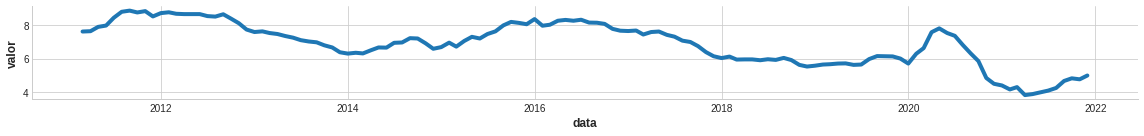

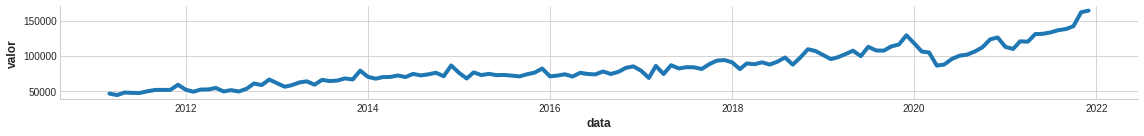

In [ ]:
#Construíndo Gráficos das Variáveis no Tempo 
import seaborn as sns
g1 = sns.relplot(data=inadimplencia, x="data", y="valor",kind="line", palette="crest", linewidth=4,height=2, aspect=8, legend=True)
g2 = sns.relplot(data=concessaocartaocreidopf, x="data", y="valor",kind="line", palette="crest", linewidth=4,height=2, aspect=8, legend=True)


In [ ]:
inadimplencia.tail()

,data,valor
125,2021-08-01,4.23
126,2021-09-01,4.65
127,2021-10-01,4.81
128,2021-11-01,4.75
129,2021-12-01,4.98


In [ ]:
concessaocartaocreidopf.tail()

,data,valor
125,2021-08-01,136350
126,2021-09-01,138010
127,2021-10-01,142067
128,2021-11-01,161982
129,2021-12-01,164274


# Default

Defaut pode ser entendido como não pagamento de alguma obrigação, trazendo prejuízo para pessoas físicas, instituições financeiras, empresas e para economia como um todo.

Existem vários estudos e algoritimos para análise de padrões na concessão de crédito, principalmente em grandes instuições, visando reduzir o impacto da inadimplência em sua carteira de clientes. 

*Mariane Daros e Nelson Guilherme Machado Pinto* colocam que: "Nenhuma empresa deseja ter inadimplentes em sua carteira de clientes. Assim, conhecer o perfil de seus atuais clientes e compreender as causas dos inadimplentes são alguns dos meios para evitar tal fenômeno".

Olhando para lado da pessoa física, existem inúmeros fenônemos que podem contribuir para o aumento da inadimplência, um exemplo em evidência nos últimos ano é a pandemia da COVID-19.

Normalmente ela ocorre por diversos fatores, desde redução na renda até esquecimento do vencimento da dívida.

Quando vamos para Cenário da Inadimplência na Pessoa Jurídica, também observamos inúmeros fatores que contribuem para tal, como redução de vendas, aumento de impostos ou taxa juros, dentre muitos outros.

Cabe destacar que inadimplência como consequência desses fatores podem levar  a crises ecônomicas enormes, como foi, por exemplo, a crise imobiliária nos EUA em 2009, que impactou o mundo tudo.


#Base de dados

A base de dados utilizada está disponível no Kaggle e foi utilizada na competição AmExpert 2021 CODELAB – Machine Learning Hackathon.

https://www.kaggle.com/pradip11/amexpert-codelab-2021

Configurações iniciais

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import drive 
drive.mount('/content/drive')
np.random.seed(42)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Importando a base de dados

In [ ]:
#Importando do drive do Marlon
df=pd.read_csv('/content/drive/MyDrive/PROJETO-FINAL-MACHINE-LEARNING/train.csv')

In [ ]:
#Importando do drive do Rodrigo
#os.chdir('/content/drive/MyDrive/Colab Notebooks/FGV MFEE 2021/Machine Learning/Trabalho Final')
#df=pd.read_csv('train.csv')

##Verificando a base de dados

In [ ]:
df.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


Descrição das variáveis:


**customer_id** -	Represents the unique identification of a customer

**name** - 	Represents the name of a customer

**age** -	Represents the age of a customer ( in years ) 

**gender** -	Represents the gender of a customer( F means Female and M means Male  )

**owns_car** -	Represents whether a customer owns a car ( Y means Yes and N means No  )

**owns_house** - Represents whether a customer owns a house ( Y means Yes and N means No  )

**no_of_children**	- Represents the number of children of a customer

**net_yearly_income**	- Represents the net yearly income of a customer ( in USD )

**no_of_days_employed**	- Represents the no of days employed

**occupation_type**	- Represents the occupation type of a customer ( IT staff, Managers, Accountants, Cooking staff, etc )

**total_family_members**	- Represents the number of family members of a customer

**migrant_worker** -	Represents whether a customer is a migrant worker( 1 means Yes and 0 means No  ) 

**yearly_debt_payments** -	Represents the yearly debt payments of a customer  ( in USD )

**credit_limit**	- Represents the credit limit of a customer  ( in USD ) 

**credit_limit_used(%)**	- Represents the percentage of credit limit used by a customer

**credit_score** -	Represents the credit score of a customer

**prev_defaults**	- Represents the number of previous defaults

**default_in_last_6months** -	Represents whether a customer has defaulted in the last 6 months ( 1 means Yes and 0 means No) 

**credit_card_default**	- Represents whether there will be credit card default  ( 1 means Yes and 0 means No  ) 

Temos ao todo 19 colunas. As colunas customer_id e name não serão relevantes para o algoritmo de machine learning. A coluna credit_card_defautl é o que queremos estimar, então será o nosso label. 

Restam, portanto, 16 características. Destas 16 características, 4 (gender, owns_car, owns_house e occupation_type) são categóricas e 12 numéricas.

Podemos observar que a base contém 45528 instâncias e há alguns missing values nas características owns_car, no_of_children, no_of_days_employed, total_family_members, migrant_worker, yearly_debt_payments e credit_score.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

As escalas das variáveis são batante variadas, principalmente em função da presença de um número grande de varíaveis discretas e binárias. (ex: os valores máximos de  net_yearly_income e total_family_members são, respectivamente, 1.407590e+08	e 10).

In [ ]:
df.describe()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
count,45528.000000,44754.000000,4.552800e+04,45065.000000,45445.000000,45441.000000,45433.000000,4.552800e+04,45528.00000,45520.000000,45528.000000,45528.000000,45528.000000
mean,38.993411,0.420655,2.006556e+05,67609.289293,2.158081,0.179111,31796.965311,4.354842e+04,52.23502,782.791257,0.060710,0.050540,0.081203
std,9.543990,0.724097,6.690740e+05,139323.524434,0.911572,0.383450,17269.727234,1.487847e+05,29.37691,100.619746,0.264629,0.219059,0.273149
min,23.000000,0.000000,2.717061e+04,2.000000,1.000000,0.000000,2237.470000,4.003140e+03,0.00000,500.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,1.263458e+05,936.000000,2.000000,0.000000,19231.140000,2.397381e+04,27.00000,704.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,1.717149e+05,2224.000000,2.000000,0.000000,29081.650000,3.568804e+04,54.00000,786.000000,0.000000,0.000000,0.000000
75%,47.000000,1.000000,2.406038e+05,5817.000000,3.000000,0.000000,40561.150000,5.343576e+04,78.00000,867.000000,0.000000,0.000000,0.000000
max,55.000000,9.000000,1.407590e+08,365252.000000,10.000000,1.000000,328112.860000,3.112997e+07,99.00000,949.000000,2.000000,1.000000,1.000000


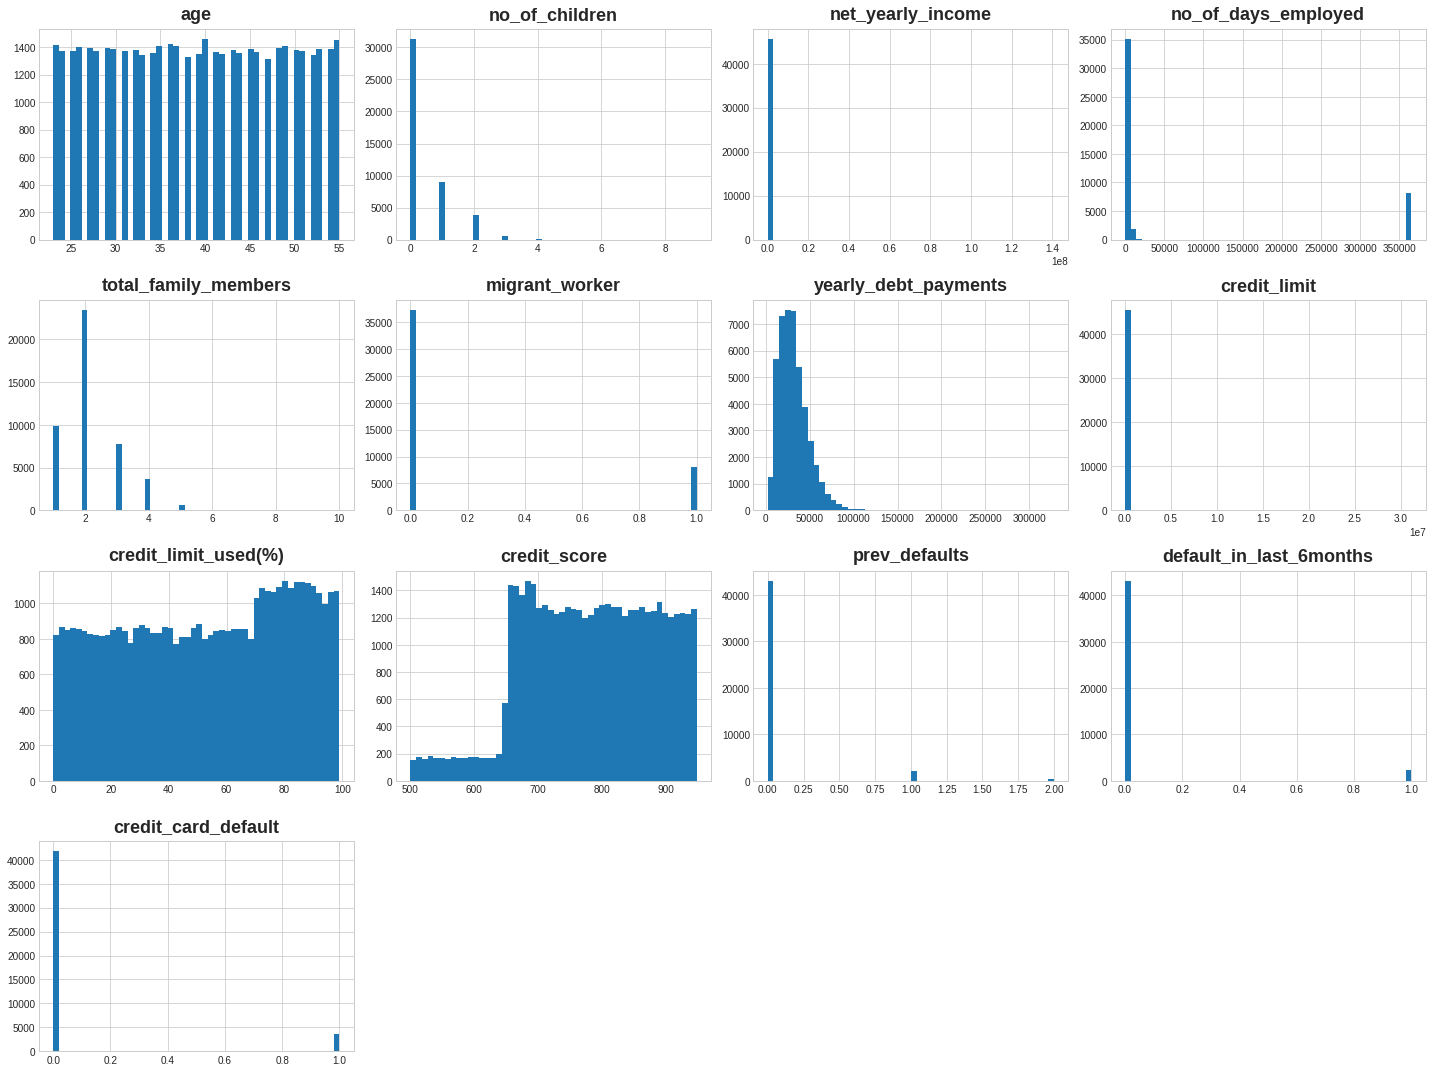

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Além disso, podemos constantar que a base de dados é desbalanceada, pois a nossa varíavel alvo, quando poussui falar positivo, tem pouca representatividade na base (<10%).

In [ ]:
default_prop = df["credit_card_default"].value_counts()/len(df)
default_prop

0    0.918797
1    0.081203
Name: credit_card_default, dtype: float64

##Avaliando possíveis estratificações da base

###Gênero

Temos 3 tipos de gênero na base de dados (F, M e XNA). No entanto, XNA possui apenas uma observação, o que inviabiliza o seu uso no modelo.

Identificamos as seguintes opções de tratamento:

1.   Atribuí-la arbitrariamente a algum grupo;
2.   Expurgar da base.

Dado que estamos falando de 1 instância em 45k+, o impacto é irrelevante em quaisquer dos grupos. Portanto optamos por retirar da base.

In [ ]:
df["gender"].value_counts()

F      29957
M      15570
XNA        1
Name: gender, dtype: int64

Excluindo a linha com gender = XNA

In [ ]:
df.drop(df[df['gender']=='XNA'].index,inplace=True)

In [ ]:
df["gender"].value_counts()

F    29957
M    15570
Name: gender, dtype: int64

Verificando a proporção dos sexos na base de dados.

In [ ]:
gender_prop = df["gender"].value_counts()/len(df)
gender_prop

F    0.658005
M    0.341995
Name: gender, dtype: float64

Verificando como a variável alvo (credit_card_default) está distribuída nos sexos.

In [ ]:
gender_default_prop = df[df['credit_card_default']==1]['gender'].value_counts()/df["gender"].value_counts()
gender_default_prop

F    0.069867
M    0.103019
Name: gender, dtype: float64

Podemos constatar que a proporção de default é maior no sexo masculino que no sexo feminino.

In [ ]:
gender_resume = pd.concat([gender_prop, gender_default_prop], axis=1)*100
gender_resume.columns = ['% de Instâncias', '% de Default']
gender_resume

,% de Instâncias,% de Default
F,65.800514,6.986681
M,34.199486,10.301863


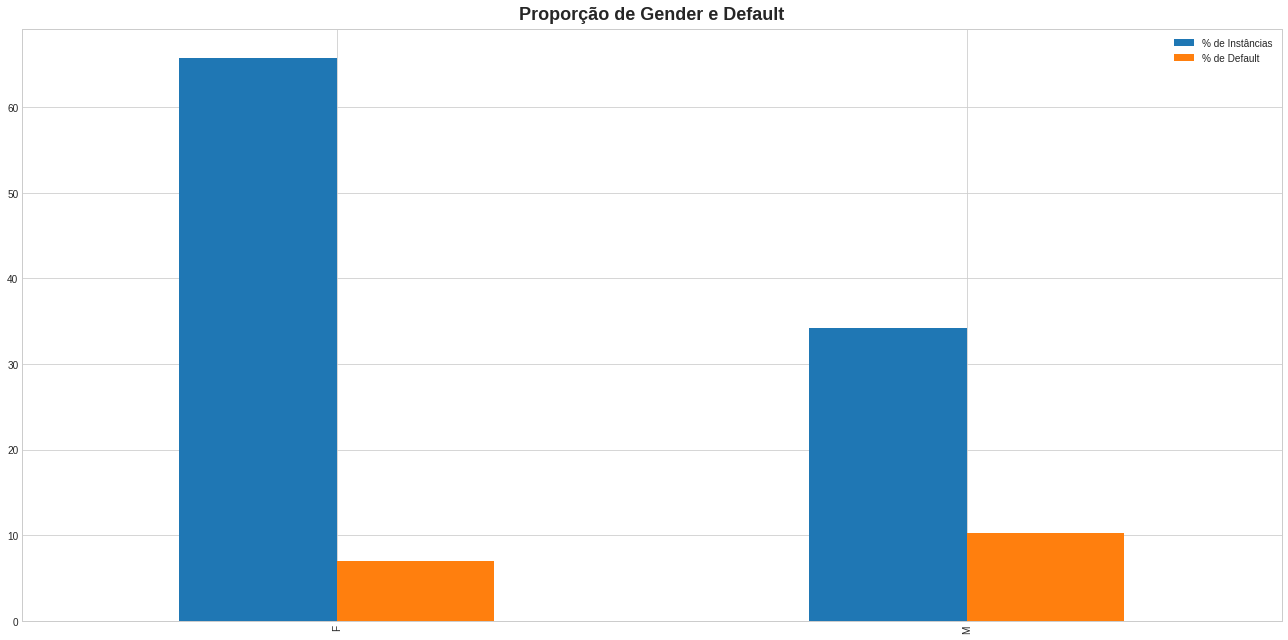

In [ ]:
#plt.barh(y = occ_prop.index, width=occ_prop_inc.values, label='Proporção do Total de Renda')
#plt.xlabel("Proporção")
gender_resume.plot.bar(figsize=(18,9))
plt.title('Proporção de Gender e Default', fontweight="bold")
plt.legend(loc="upper right")
plt.show()

###Credit Score

In [ ]:
#Criei uma cópia da base de dados original para utilização na parte de estratificação por credit score
df2 = df.copy()

In [ ]:
df['credit_score'].unique()

array([544., 857., 650., 754., 927., 937., 733., 906., 783., 666., 781.,
       889., 643., 909., 874., 763., 582., 699., 753., 710., 651., 893.,
       519., 895., 801., 880., 943., 795., 886., 832., 823., 766., 904.,
       919., 922., 673., 738., 684., 851., 695., 902., 724., 931., 811.,
       848., 737., 717., 891., 814., 723., 800., 715., 692., 947., 912.,
       735., 782., 843., 900., 532., 883., 713., 679., 934., 797., 730.,
       863., 949., 702., 867., 688., 774., 923., 676., 876., 703., 667.,
       620., 926., 835., 608., 736., 655., 808., 905., 948., 658., 731.,
       825., 677., 681., 682., 946., 672., 864., 833., 815., 828., 700.,
       894., 698., 890., 793., 689., 660., 802., 810., 853., 789., 777.,
       752., 870., 761., 701., 719., 628., 785., 750., 525., 872., 640.,
       856., 888., 792., 760., 865., 696., 824., 709., 740., 668., 846.,
       929., 786., 859., 728., 917., 944., 674., 915., 665., 840., 512.,
       892., 546., 942., 794., 898., 751., 742., 71

Como já vimos que credit_score possui missing values, precisaremos eliminá-los para fazer a estratificação com base nessa característica.

In [ ]:
df.drop(df[df['credit_score'].isna()].index, inplace=True)
df['credit_score'].isna().sum()

0

In [ ]:
df['cred_score_cat'] = pd.cut(df['credit_score'], bins=([0, 700, 850, np.inf]), labels=['<700', '<850', '850+'])
df.groupby('cred_score_cat')['customer_id'].count()/len(df)

cred_score_cat
<700    0.239482
<850    0.459259
850+    0.301259
Name: customer_id, dtype: float64

In [ ]:
df['cred_score_cat']

0        <700
1        850+
2        <700
3        <850
4        850+
         ... 
45523    850+
45524    <700
45525    <850
45526    <850
45527    <700
Name: cred_score_cat, Length: 45519, dtype: category
Categories (3, object): ['<700' < '<850' < '850+']

Conferindo a coluna cred_score_cat


In [ ]:
df.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default,cred_score_cat
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1,<700
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0,850+
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0,<700
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0,<850
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0,850+


Combinando Gender e Credt Score

In [ ]:
df['gender_cred_score_cat'] = df['gender'].astype(str) + df['cred_score_cat'].astype(str)
df['gender_cred_score_cat']

0        F<700
1        M850+
2        M<700
3        F<850
4        M850+
         ...  
45523    F850+
45524    F<700
45525    F<850
45526    M<850
45527    M<700
Name: gender_cred_score_cat, Length: 45519, dtype: object

In [ ]:
gender_cred_score_prop = df.groupby('gender_cred_score_cat')['customer_id'].count()/len(df)
gender_cred_score_prop

gender_cred_score_cat
F850+    0.199433
F<700    0.150926
F<850    0.307652
M850+    0.101826
M<700    0.088556
M<850    0.151607
Name: customer_id, dtype: float64

"Dropando" cred_score_cat, pois não precisamos mais dela.

In [ ]:
df.drop('cred_score_cat', axis=1, inplace=True)
df.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default,gender_cred_score_cat
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1,F<700
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0,M850+
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0,M<700
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0,F<850
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0,M850+


#Separando as bases de treino e de teste

Realizando a separação das bases considerando a estratificação apenas do sexo.

<b><font color=blue> Enquanto não fechamos a questão da estratificação por faixa etária, vamos excluir a coluna age_cat para podermos seguir comn o código.



In [ ]:
df = df.reset_index()
df.head()

,index,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default,gender_cred_score_cat
0,0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1,F<700
1,1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0,M850+
2,2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0,M<700
3,3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0,F<850
4,4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0,M850+


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_index, test_index in split.split(df, df["gender_cred_score_cat"]):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]

Verificando o tamanho dos conjuntos criados.

In [ ]:
print(f"Treino: {len(train_set)}\nTeste: {len(test_set)}")

Treino: 36415
Teste: 9104


Conferindo se a estratificação foi executada corretamente.

In [ ]:
gender_cred_score_prop_train = train_set.groupby('gender_cred_score_cat')['customer_id'].count()/len(train_set)
gender_cred_score_prop_test = test_set.groupby('gender_cred_score_cat')['customer_id'].count()/len(test_set)

In [ ]:
compara_props_strat = pd.concat([gender_cred_score_prop, gender_cred_score_prop_test, gender_cred_score_prop_test],axis=1)
compara_props_strat.columns = ['Prop DF', 'Prop Train Set', 'Prop Test Set']
compara_props_strat

,Prop DF,Prop Train Set,Prop Test Set
gender_cred_score_cat,,,
F850+,0.199433,0.199473,0.199473
F<700,0.150926,0.150923,0.150923
F<850,0.307652,0.307667,0.307667
M850+,0.101826,0.101823,0.101823
M<700,0.088556,0.088533,0.088533
M<850,0.151607,0.151582,0.151582


Excluindo a coluna de estratificação das bases de treino e teste.

In [ ]:
#Excluindo da base de treino e teste atraibuto Credit Score Cat
train_set.drop('gender_cred_score_cat', axis=1, inplace=True)
test_set.drop('gender_cred_score_cat', axis=1, inplace=True)

In [ ]:
train_set.columns

Index(['index', 'customer_id', 'name', 'age', 'gender', 'owns_car',
       'owns_house', 'no_of_children', 'net_yearly_income',
       'no_of_days_employed', 'occupation_type', 'total_family_members',
       'migrant_worker', 'yearly_debt_payments', 'credit_limit',
       'credit_limit_used(%)', 'credit_score', 'prev_defaults',
       'default_in_last_6months', 'credit_card_default'],
      dtype='object')

In [ ]:
test_set.columns

Index(['index', 'customer_id', 'name', 'age', 'gender', 'owns_car',
       'owns_house', 'no_of_children', 'net_yearly_income',
       'no_of_days_employed', 'occupation_type', 'total_family_members',
       'migrant_worker', 'yearly_debt_payments', 'credit_limit',
       'credit_limit_used(%)', 'credit_score', 'prev_defaults',
       'default_in_last_6months', 'credit_card_default'],
      dtype='object')

#Explorando os dados

Criando uma cópia do conjunto de treinamento para preservar o original.

In [ ]:
default = train_set.copy()
default.head()

,index,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
31128,31136,CST_118565,Lucia Mutikani,45,F,N,Y,0.0,162995.56,365243.0,Unknown,2.0,0.0,35912.56,51522.13,19,736.0,0,0,0
13750,13753,CST_157031,Ruwitch,50,M,N,N,0.0,197138.85,3887.0,Unknown,2.0,0.0,16685.28,24589.31,91,800.0,0,0,0
41545,41554,CST_109938,Tim Kelly,45,F,Y,Y,0.0,138685.67,2278.0,Medicine staff,1.0,0.0,19780.61,39776.34,93,845.0,0,0,0
18526,18530,CST_150508,Mutikani,25,F,N,N,0.0,156335.72,107.0,Sales staff,2.0,0.0,28060.29,53002.54,29,746.0,0,0,0
29684,29692,CST_157731,Schwartz,34,F,N,Y,0.0,113370.15,365243.0,Unknown,1.0,0.0,10768.04,22665.66,71,812.0,0,0,0


Aparentemente há uma correlação positiva e alta do label (credit_card_default) com as características default_in_last_6months e prev_defaults.

Com relação às correlações negativas, destacam-se no_of_days_employed e o credit_score, o que está dentro do esperado.

In [ ]:
corr_matrix = default.corr()
corr_matrix['credit_card_default'].sort_values(ascending=False)

credit_card_default        1.000000
default_in_last_6months    0.773166
prev_defaults              0.768829
credit_limit_used(%)       0.326350
migrant_worker             0.031580
no_of_children             0.023358
credit_limit               0.013735
net_yearly_income          0.013448
total_family_members       0.011451
index                      0.005118
age                       -0.000279
yearly_debt_payments      -0.013017
no_of_days_employed       -0.046761
credit_score              -0.545195
Name: credit_card_default, dtype: float64

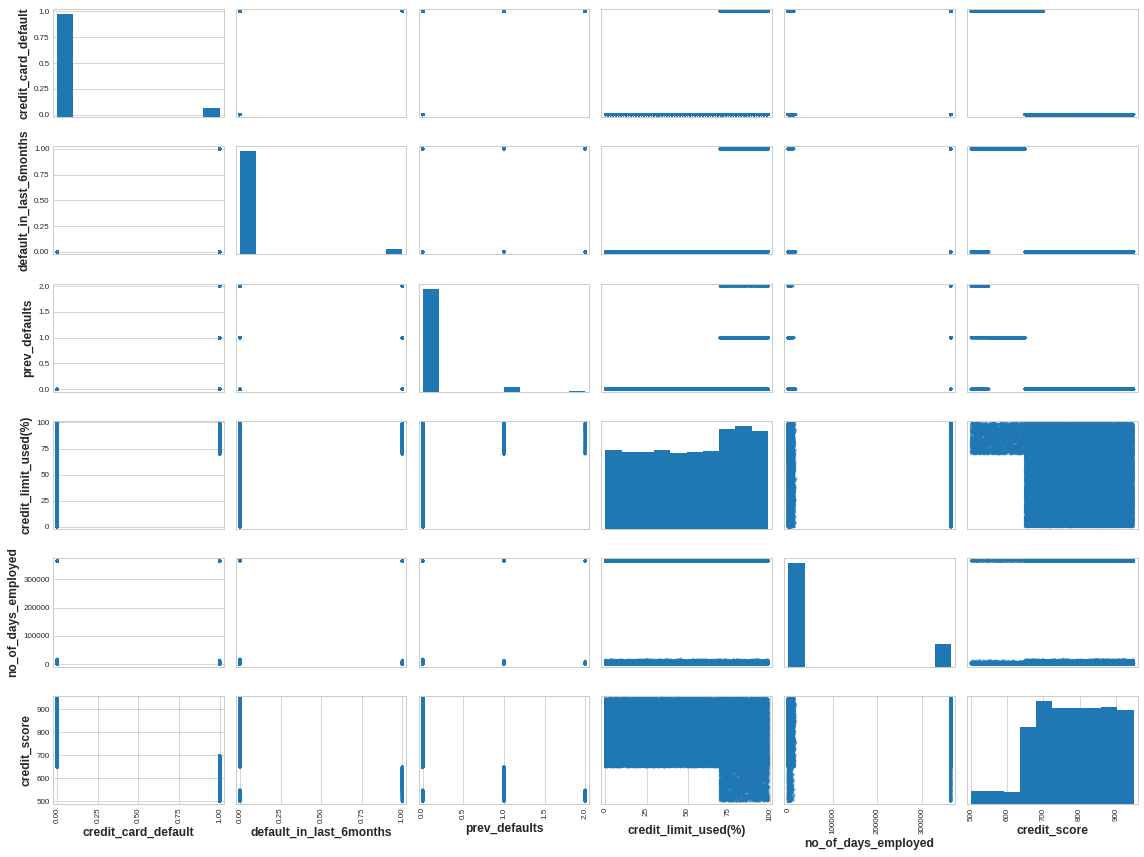

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["credit_card_default", "default_in_last_6months", "prev_defaults",
              "credit_limit_used(%)", 'no_of_days_employed', 'credit_score']
scatter_matrix(default[attributes], figsize=(16, 12))
plt.show()

#Preparando os dados para os algoritmos

##Separando características e labels

Características.

In [ ]:
todrop = ['credit_card_default', 'index']
default_X = train_set.drop(todrop, axis=1)
default_X.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
31128,CST_118565,Lucia Mutikani,45,F,N,Y,0.0,162995.56,365243.0,Unknown,2.0,0.0,35912.56,51522.13,19,736.0,0,0
13750,CST_157031,Ruwitch,50,M,N,N,0.0,197138.85,3887.0,Unknown,2.0,0.0,16685.28,24589.31,91,800.0,0,0
41545,CST_109938,Tim Kelly,45,F,Y,Y,0.0,138685.67,2278.0,Medicine staff,1.0,0.0,19780.61,39776.34,93,845.0,0,0
18526,CST_150508,Mutikani,25,F,N,N,0.0,156335.72,107.0,Sales staff,2.0,0.0,28060.29,53002.54,29,746.0,0,0
29684,CST_157731,Schwartz,34,F,N,Y,0.0,113370.15,365243.0,Unknown,1.0,0.0,10768.04,22665.66,71,812.0,0,0


Labels.

In [ ]:
default_Y = train_set["credit_card_default"].copy()
default_Y.head()

31128    0
13750    0
41545    0
18526    0
29684    0
Name: credit_card_default, dtype: int64

##Definindo e separando as variáveis numéricas e categóricas

###Variáveis categóricas

Separando variáveis categóricas.

In [ ]:
default_X.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
31128,CST_118565,Lucia Mutikani,45,F,N,Y,0.0,162995.56,365243.0,Unknown,2.0,0.0,35912.56,51522.13,19,736.0,0,0
13750,CST_157031,Ruwitch,50,M,N,N,0.0,197138.85,3887.0,Unknown,2.0,0.0,16685.28,24589.31,91,800.0,0,0
41545,CST_109938,Tim Kelly,45,F,Y,Y,0.0,138685.67,2278.0,Medicine staff,1.0,0.0,19780.61,39776.34,93,845.0,0,0
18526,CST_150508,Mutikani,25,F,N,N,0.0,156335.72,107.0,Sales staff,2.0,0.0,28060.29,53002.54,29,746.0,0,0
29684,CST_157731,Schwartz,34,F,N,Y,0.0,113370.15,365243.0,Unknown,1.0,0.0,10768.04,22665.66,71,812.0,0,0


In [ ]:
cat = ['gender', 'owns_car', 'owns_house', 'occupation_type', 'migrant_worker']
cat

['gender', 'owns_car', 'owns_house', 'occupation_type', 'migrant_worker']

In [ ]:
default_X_cat = default_X[cat]
default_X_cat

,gender,owns_car,owns_house,occupation_type,migrant_worker
31128,F,N,Y,Unknown,0.0
13750,M,N,N,Unknown,0.0
41545,F,Y,Y,Medicine staff,0.0
18526,F,N,N,Sales staff,0.0
29684,F,N,Y,Unknown,0.0
...,...,...,...,...,...
38078,F,Y,Y,Managers,1.0
44973,F,N,N,Sales staff,1.0
16328,F,N,Y,Unknown,0.0
10124,F,N,N,Unknown,0.0


Temos 19 tipos de ocupação.




In [ ]:
default_X['occupation_type'].value_counts()

Unknown                  11429
Laborers                  6541
Sales staff               3797
Core staff                3240
Managers                  2550
Drivers                   2179
High skill tech staff     1359
Accountants               1165
Medicine staff            1028
Security staff             815
Cooking staff              705
Cleaning staff             524
Private service staff      312
Low-skill Laborers         269
Waiters/barmen staff       153
Secretaries                147
Realty agents               80
HR staff                    68
IT staff                    54
Name: occupation_type, dtype: int64

###Variáveis numéricas

Separando variáveis numéricas.

In [ ]:
num = ['age', 'no_of_children', 'net_yearly_income', 'no_of_days_employed' ,
       'total_family_members', 'yearly_debt_payments', 'credit_limit',
       'credit_limit_used(%)', 'credit_score', 'prev_defaults', 'default_in_last_6months']
num

['age',
 'no_of_children',
 'net_yearly_income',
 'no_of_days_employed',
 'total_family_members',
 'yearly_debt_payments',
 'credit_limit',
 'credit_limit_used(%)',
 'credit_score',
 'prev_defaults',
 'default_in_last_6months']

In [ ]:
default_X_num = default_X[num]
default_X_num.head()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
31128,45,0.0,162995.56,365243.0,2.0,35912.56,51522.13,19,736.0,0,0
13750,50,0.0,197138.85,3887.0,2.0,16685.28,24589.31,91,800.0,0,0
41545,45,0.0,138685.67,2278.0,1.0,19780.61,39776.34,93,845.0,0,0
18526,25,0.0,156335.72,107.0,2.0,28060.29,53002.54,29,746.0,0,0
29684,34,0.0,113370.15,365243.0,1.0,10768.04,22665.66,71,812.0,0,0


##Preparando os pipelines de transformação dos dados

###Pipeline numérico

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

Definindo o pipeline numérico

In [ ]:
num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy='median')),
                         ('std_scaler', StandardScaler())
])

Aplicando o pipeline numérico.

In [ ]:
default_X_num_prep = num_pipeline.fit_transform(default_X_num)
default_X_num_prep

array([[ 0.63067043, -0.57383931, -0.05148975, ..., -0.46322215,
        -0.2290671 , -0.23035919],
       [ 1.15436434, -0.57383931, -0.00571616, ...,  0.17147789,
        -0.2290671 , -0.23035919],
       [ 0.63067043, -0.57383931, -0.08408036, ...,  0.61775136,
        -0.2290671 , -0.23035919],
       ...,
       [ 0.84014799, -0.57383931, -0.10523637, ...,  1.55988425,
        -0.2290671 , -0.23035919],
       [-1.25462767, -0.57383931, -0.06687131, ...,  1.36154048,
        -0.2290671 , -0.23035919],
       [-1.56884402, -0.57383931,  0.15816951, ...,  1.19294828,
        -0.2290671 , -0.23035919]])

In [ ]:
default_X_num_prep.shape

(36415, 11)

Verificando o resultado da transformação.

In [ ]:
pd.DataFrame(default_X_num_prep, columns=num).describe()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
count,3.641500e+04,3.641500e+04,3.641500e+04,3.641500e+04,3.641500e+04,3.641500e+04,3.641500e+04,3.641500e+04,3.641500e+04,3.641500e+04,3.641500e+04
mean,1.184279e-16,9.191665e-16,1.711753e-17,-1.032478e-17,7.956166e-17,-2.378069e-16,4.340624e-17,7.364088e-17,9.343983e-17,-3.489794e-15,-2.871269e-15
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-1.673583e+00,-5.738393e-01,-2.335810e-01,-4.834565e-01,-1.265856e+00,-1.714082e+00,-2.397512e-01,-1.776866e+00,-2.803679e+00,-2.290671e-01,-2.303592e-01
25%,-8.356725e-01,-5.738393e-01,-1.007467e-01,-4.766419e-01,-1.720529e-01,-7.287679e-01,-1.192920e-01,-8.923733e-01,-7.805722e-01,-2.290671e-01,-2.303592e-01
50%,2.237725e-03,-5.738393e-01,-3.943114e-02,-4.674669e-01,-1.720529e-01,-1.574235e-01,-4.881716e-02,6.015695e-02,3.263726e-02,-2.290671e-01,-2.303592e-01
75%,8.401480e-01,8.122285e-01,5.298203e-02,-4.421584e-01,9.217505e-01,5.122800e-01,5.854972e-02,8.766114e-01,8.359295e-01,-2.290671e-01,-2.303592e-01
max,1.678058e+00,1.190077e+01,1.884360e+02,2.144889e+00,8.578374e+00,1.717261e+01,1.875950e+02,1.591009e+00,1.649139e+00,7.378300e+00,4.341047e+00


<function matplotlib.pyplot.show>

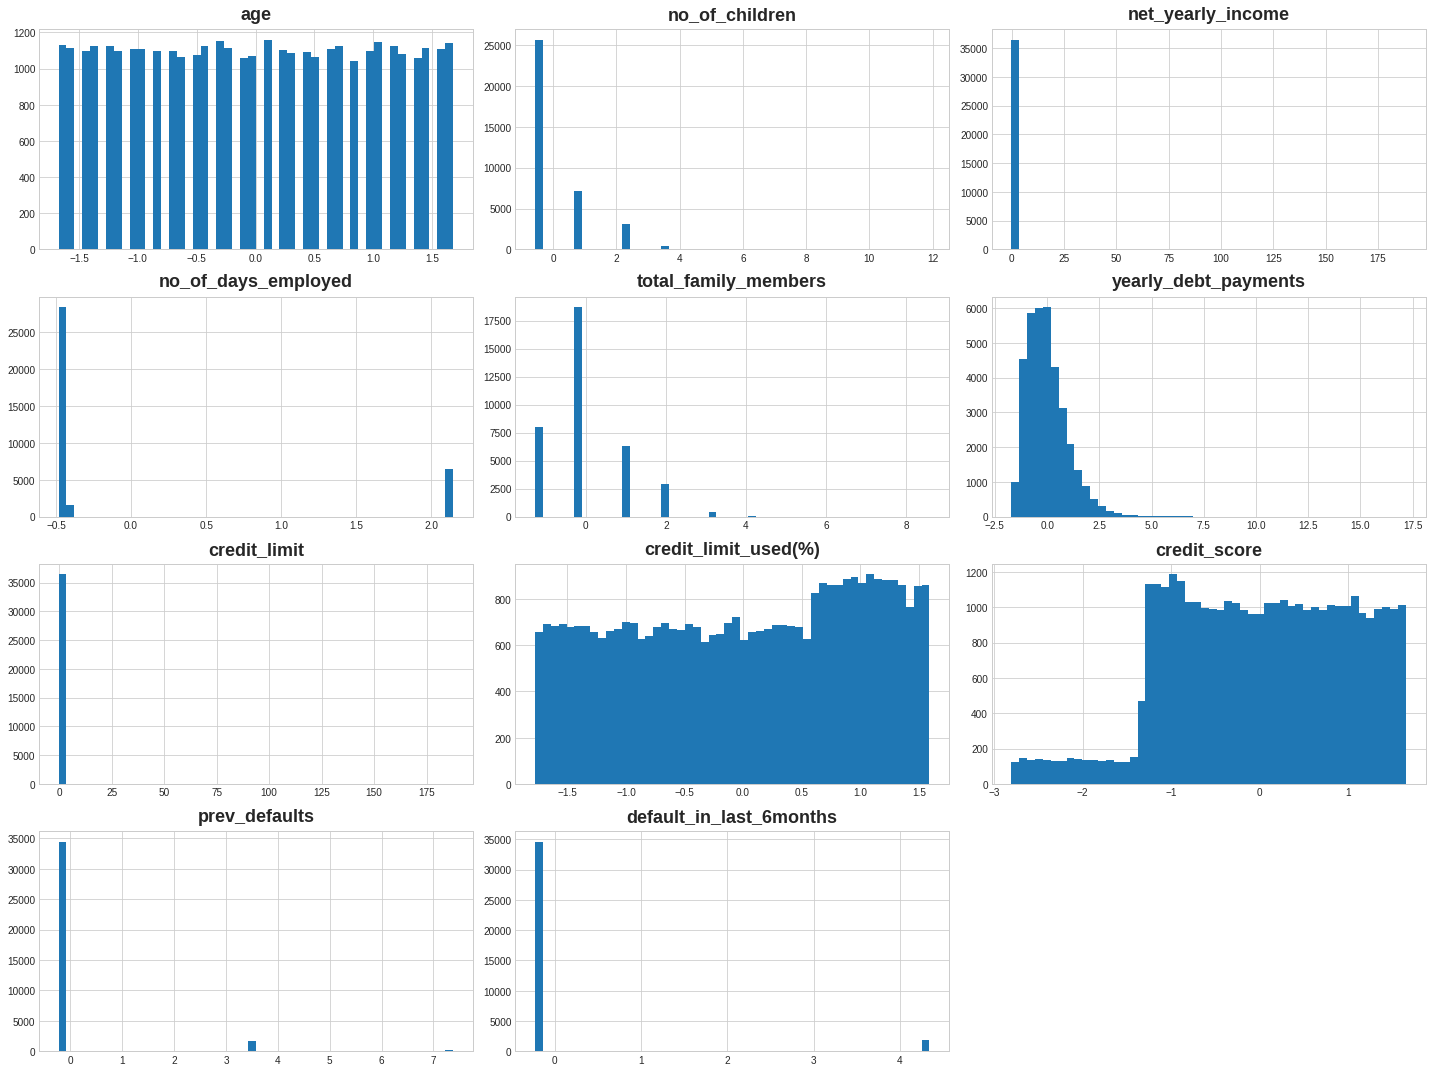

In [ ]:
pd.DataFrame(default_X_num_prep, columns=num).hist(bins=50, figsize=(20,15))
plt.show

###Pipeline categórico

In [ ]:
default_X_cat

,gender,owns_car,owns_house,occupation_type,migrant_worker
31128,F,N,Y,Unknown,0.0
13750,M,N,N,Unknown,0.0
41545,F,Y,Y,Medicine staff,0.0
18526,F,N,N,Sales staff,0.0
29684,F,N,Y,Unknown,0.0
...,...,...,...,...,...
38078,F,Y,Y,Managers,1.0
44973,F,N,N,Sales staff,1.0
16328,F,N,Y,Unknown,0.0
10124,F,N,N,Unknown,0.0


Definindo o encoder categórico.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

In [ ]:
default_X_cat_1hot = cat_encoder.fit_transform(default_X_cat)
default_X_cat_1hot = default_X_cat_1hot.toarray()
default_X_cat_1hot

array([[1., 0., 1., ..., 1., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.]])

Temos 2 colunas novas a mais do que esperado, pois owns_car e migrant_worker têm missing values, então o OneHotEncoder gerou uma coluna a mais para cada um deles para representar o missing value. 

Como não é possível arbitrar um valor da mesma forma que fazemos para variáveis números, temos as seguintes alternativas: 

1.   Ignorar as observações;
2.   Ignorar a variável;
3.   Desenvolver um modelo para predizer os *missing values*;
4.   Tratar como se fosse mais uma categoria.

Entendemos que no nosso caso a 4ª opção seria a mais interessante e seguimos com ela.






In [ ]:
default_X_cat.nunique()

gender              2
owns_car            2
owns_house          2
occupation_type    19
migrant_worker      2
dtype: int64

In [ ]:
default_X_cat.nunique().sum()

27

In [ ]:
default_X_cat.isna().sum()

gender               0
owns_car           444
owns_house           0
occupation_type      0
migrant_worker      67
dtype: int64

In [ ]:
default_X_cat_1hot.shape

(36415, 29)

###Pipeline completo

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
full_pipeline = ColumnTransformer([
                                   ("num", num_pipeline, num),
                                   ("cat",OneHotEncoder(), cat)
])

In [ ]:
default_X_prep = full_pipeline.fit_transform(default_X)

In [ ]:
default_X_prep.shape

(36415, 40)

Preparando a base de teste.

In [ ]:
todrop = ['credit_card_default', 'index']
default_X_test = test_set.drop(todrop, axis=1)
default_X_test.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
16932,CST_100313,Scott Malone,42,F,N,Y,0.0,94647.46,365246.0,Unknown,2.0,0.0,45827.60,12413.88,0,889.0,0,0
7392,CST_109438,Elizabeth Pineau,52,F,N,N,0.0,262289.97,1148.0,Managers,1.0,0.0,36886.01,70901.59,33,662.0,0,0
40578,CST_159472,Gupta,48,F,N,Y,0.0,249777.47,2528.0,Laborers,2.0,0.0,54832.75,37253.99,80,945.0,0,0
20071,CST_121844,R,27,F,N,Y,0.0,102665.63,269.0,Laborers,1.0,0.0,16699.70,27606.68,32,712.0,0,0
33249,CST_116184,Jean Decotte,49,F,N,Y,NaN,108470.36,2394.0,Laborers,2.0,0.0,19458.12,24253.78,80,933.0,0,0


In [ ]:
default_Y_test = test_set["credit_card_default"].copy()
default_Y_test.head()

16932    0
7392     0
40578    0
20071    0
33249    0
Name: credit_card_default, dtype: int64

In [ ]:
default_X_test_prep = full_pipeline.transform(default_X_test)
default_X_test_prep

array([[ 0.31645408, -0.57383931, -0.14311939, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.36384191, -0.57383931,  0.08162752, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.94488678, -0.57383931,  0.06485286, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.36384191,  2.19829632, -0.0215971 , ...,  1.        ,
         0.        ,  0.        ],
       [-0.10250106,  0.81222851, -0.01442438, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.04962556,  0.81222851,  0.29222953, ...,  1.        ,
         0.        ,  0.        ]])

#Treinando modelos

**Modelos que serão treinados:**


1.   Regressão Logística
2.   Bagging
3.   Árvore de Decisão
4.   Random Forest
5.   Gradient Boosting




In [ ]:
from sklearn.model_selection import cross_val_predict

##Definindo algumas funções de score

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

In [ ]:
#Função para retornar matriz de confusão, precision, recall e f1
def score_completo(Y, Y_PRED):

  conf_mx = confusion_matrix(Y, Y_PRED)
  conf_mx = pd.DataFrame(conf_mx, columns=['Negativo Previsto', 'Positivo Previsto'], index=['Negativo Real', 'Positivo Real'])
  accuracy = round(accuracy_score(Y, Y_PRED),4)
  precision = round(precision_score(Y, Y_PRED),4)
  recall = round(recall_score(Y, Y_PRED),4)
  f1 = round(f1_score(Y, Y_PRED),4)

  return print(f'                    \033[1mConfusion Matrix\033[0m \n{conf_mx}\n\n Accuracy: {accuracy} | Precision: {precision} | Recall: {recall} | F1: {f1}')

In [ ]:
#Função para retornar os valores de accuracy, precision, recall e f1
def resumo_score(Y, Y_PRED):

  accuracy = round(accuracy_score(Y, Y_PRED),4)
  precision = round(precision_score(Y, Y_PRED),4)
  recall = round(recall_score(Y, Y_PRED),4)
  f1 = round(f1_score(Y, Y_PRED),4)

  return accuracy, precision, recall, f1

In [ ]:
#função para calcular o cross validation para as métricas accuracy, precision, recall e f1
def resumo_xval_score(model, X, Y, kfold):

  accuracy = cross_val_score(model, X, Y, cv=kfold, scoring="accuracy")
  precision = cross_val_score(model, X, Y, cv=kfold, scoring="precision")
  recall = cross_val_score(model, X, Y, cv=kfold, scoring="recall")
  f1 = cross_val_score(model, X, Y, cv=kfold, scoring="f1")

  return accuracy.mean(), precision.mean(), recall.mean(), f1.mean()

##Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

200 iterações foi o suficiente para convergência (com 100 deu erro no fit e 150 no cross_validation).

In [ ]:
#Definindo o modelo
lr = LogisticRegression(max_iter=200)

**Base de Treino**

In [ ]:
lr.fit(default_X_prep, default_Y)

LogisticRegression(max_iter=200)

In [ ]:
#Predizendo os valores no conjunto de treino
pred_train_lr = lr.predict(default_X_prep)
pred_train_lr

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Score sem validação cruzada
score_completo(default_Y, pred_train_lr)

                    Confusion Matrix 
               Negativo Previsto  Positivo Previsto
Negativo Real              33344                102
Positivo Real                643               2326

 Accuracy: 0.9795 | Precision: 0.958 | Recall: 0.7834 | F1: 0.862


In [ ]:
#Predição com validação cruzada
xpred_train_lr = cross_val_predict(lr, default_X_prep, default_Y, cv=5)

In [ ]:
#Score com validação cruzada
score_completo(default_Y, xpred_train_lr)

                    Confusion Matrix 
               Negativo Previsto  Positivo Previsto
Negativo Real              33338                108
Positivo Real                652               2317

 Accuracy: 0.9791 | Precision: 0.9555 | Recall: 0.7804 | F1: 0.8591


**Base de Teste**

In [ ]:
#Predição sem validação cruzada
pred_test_lr = lr.predict(default_X_test_prep)

In [ ]:
#Score sem validação cruzada
score_completo(default_Y_test, pred_test_lr)

                    Confusion Matrix 
               Negativo Previsto  Positivo Previsto
Negativo Real               8345                 32
Positivo Real                151                576

 Accuracy: 0.9799 | Precision: 0.9474 | Recall: 0.7923 | F1: 0.8629


In [ ]:
#Predição com validação cruzada
xpred_test_lr = cross_val_predict(lr, default_X_test_prep, default_Y_test, cv=5)

In [ ]:
#Score Com validação cruzada
score_completo(default_Y_test, xpred_test_lr)

                    Confusion Matrix 
               Negativo Previsto  Positivo Previsto
Negativo Real               8346                 31
Positivo Real                158                569

 Accuracy: 0.9792 | Precision: 0.9483 | Recall: 0.7827 | F1: 0.8576


##Regressão Logística com Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

###Modelo antes do GridSearch

In [ ]:
#parâmetros default = n_estimators: default=10; bootstrap: default=True; bootstrap_features: default=False
#parâmetros 1ª tentativa = lr, n_estimators=500, bootstrap=False
bag_lr = BaggingClassifier(lr)

**Base de Treino**

In [ ]:
bag_lr.fit(default_X_prep, default_Y)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=200))

In [ ]:
#Predição sem validação cruzada
pred_train_bag_lr = bag_lr.predict(default_X_prep)
pred_train_bag_lr

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Score sem validação cruzada
score_completo(default_Y, pred_train_bag_lr)

                    Confusion Matrix 
               Negativo Previsto  Positivo Previsto
Negativo Real              33335                111
Positivo Real                642               2327

 Accuracy: 0.9793 | Precision: 0.9545 | Recall: 0.7838 | F1: 0.8607


In [ ]:
#Predição com validação cruzada
xpred_train_bag_lr = cross_val_predict(bag_lr, default_X_prep, default_Y, cv=5)
xpred_train_bag_lr

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Score com validação cruzada
score_completo(default_Y, xpred_train_bag_lr)

                    Confusion Matrix 
               Negativo Previsto  Positivo Previsto
Negativo Real              33326                120
Positivo Real                649               2320

 Accuracy: 0.9789 | Precision: 0.9508 | Recall: 0.7814 | F1: 0.8578


**Base de Teste**

In [ ]:
#Predição sem validação cruzada
pred_test_bag_lr = bag_lr.predict(default_X_test_prep)
pred_test_bag_lr

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
#Score sem validação cruzada
score_completo(default_Y_test, pred_test_bag_lr)

                    Confusion Matrix 
               Negativo Previsto  Positivo Previsto
Negativo Real               8346                 31
Positivo Real                152                575

 Accuracy: 0.9799 | Precision: 0.9488 | Recall: 0.7909 | F1: 0.8627


In [ ]:
#Predição com validação cruzada
xpred_test_bag_lr = cross_val_predict(bag_lr, default_X_test_prep, default_Y_test, cv=5)
xpred_test_bag_lr

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
#Score com validação cruzada
score_completo(default_Y_test, xpred_test_bag_lr)

                    Confusion Matrix 
               Negativo Previsto  Positivo Previsto
Negativo Real               8351                 26
Positivo Real                159                568

 Accuracy: 0.9797 | Precision: 0.9562 | Recall: 0.7813 | F1: 0.86


<b><font color=black>Podemos observar que os valores foram bem próximos ao realizado pelo conjunto de treinamento.



###Modelo após GridSearch

In [ ]:
#Rodei Grid Search para Otimização
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

param_grid1 = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4,8,16]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

bag_lr1 = BaggingClassifier(random_state=42)

grid_search_reg_bag = GridSearchCV(bag_lr1, param_grid1, cv=5,
                           return_train_score=True)
grid_search_reg_bag.fit(default_X_prep, default_Y)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=42),
             param_grid=[{'max_features': [2, 4, 8, 16],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True)

In [ ]:
grid_search_reg_bag.best_params_

{'max_features': 16, 'n_estimators': 30}

In [ ]:
grid_search_reg_bag.best_estimator_


BaggingClassifier(max_features=16, n_estimators=30, random_state=42)

In [ ]:
bag_lr_2 = BaggingClassifier(n_estimators=30, max_features=16)
bag_lr_2.fit(default_X_prep, default_Y)

BaggingClassifier(max_features=16, n_estimators=30)

In [ ]:
#Predição com validação cruzada com parâmetros estimados pelo Grid Search
cross_pred_train_bag_lr_2 = cross_val_predict(bag_lr_2, default_X_prep, default_Y, cv=5)
cross_pred_train_bag_lr_2

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
score_completo(default_Y, cross_pred_train_bag_lr_2)

                    Confusion Matrix 
               Negativo Previsto  Positivo Previsto
Negativo Real              33446                  0
Positivo Real                830               2139

 Accuracy: 0.9772 | Precision: 1.0 | Recall: 0.7204 | F1: 0.8375


In [ ]:
cross_pred_test_bag_lr_2 = cross_val_predict(bag_lr_2, default_X_test_prep, default_Y_test, cv=5)
cross_pred_test_bag_lr_2

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
score_completo(default_Y_test, cross_pred_test_bag_lr_2)

                    Confusion Matrix 
               Negativo Previsto  Positivo Previsto
Negativo Real               8377                  0
Positivo Real                191                536

 Accuracy: 0.979 | Precision: 1.0 | Recall: 0.7373 | F1: 0.8488


##Árvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

###Modelo antes do GridSearch

In [ ]:
#parâmetros padrão - max_depth: default=None; max_features: default=None; max_leaf_nodes: default=None
tree_clf = DecisionTreeClassifier()

**Base de Treino**

In [ ]:
tree_clf.fit(default_X_prep, default_Y)

DecisionTreeClassifier()

In [ ]:
tree_clf.get_depth()

29

In [ ]:
tree_clf.get_n_leaves()

526

In [ ]:
#Predição sem validação cruzada
pred_train_tree_Y = tree_clf.predict(default_X_prep)
pred_train_tree_Y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Score sem validação cruzada
score_completo(default_Y, pred_train_tree_Y)

                    Confusion Matrix 
               Negativo Previsto  Positivo Previsto
Negativo Real              33446                  0
Positivo Real                  0               2969

 Accuracy: 1.0 | Precision: 1.0 | Recall: 1.0 | F1: 1.0


In [ ]:
#Predição com validação cruzada
cross_pred_train_tree_Y = cross_val_predict(tree_clf, default_X_prep, default_Y, cv=5)
cross_pred_train_tree_Y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Score com validação cruzada
score_completo(default_Y, cross_pred_train_tree_Y)

                    Confusion Matrix 
               Negativo Previsto  Positivo Previsto
Negativo Real              32906                540
Positivo Real                492               2477

 Accuracy: 0.9717 | Precision: 0.821 | Recall: 0.8343 | F1: 0.8276


**Base de Teste**

In [ ]:
#Predição sem validação cruzada
pred_test_tree_clf_Y = tree_clf.predict(default_X_test_prep)
pred_test_tree_clf_Y

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
#score sem validação cruzada
score_completo(default_Y_test, pred_test_tree_clf_Y)

                    Confusion Matrix 
               Negativo Previsto  Positivo Previsto
Negativo Real               8256                121
Positivo Real                122                605

 Accuracy: 0.9733 | Precision: 0.8333 | Recall: 0.8322 | F1: 0.8328


In [ ]:
#Predição com validação cruzada
xpred_test_tree_clf = cross_val_predict(tree_clf, default_X_test_prep, default_Y_test, cv=5)
xpred_test_tree_clf

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
#score com validação cruzada
score_completo(default_Y_test, xpred_test_tree_clf)

                    Confusion Matrix 
               Negativo Previsto  Positivo Previsto
Negativo Real               8249                128
Positivo Real                123                604

 Accuracy: 0.9724 | Precision: 0.8251 | Recall: 0.8308 | F1: 0.828


###Modelo após GridSearch

In [ ]:
#Rodei Grid Search para Otimização
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid2 = [
    { 'max_depth': [3, 10, 30],'max_features': [None],'max_leaf_nodes': [8,32, 64, 128]},
     ]

tree_clf_2 = DecisionTreeClassifier(random_state=42)

grid_search_tree = GridSearchCV(tree_clf_2, param_grid2, cv=5,
                           return_train_score=True)
grid_search_tree.fit(default_X_prep, default_Y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'max_depth': [3, 10, 30], 'max_features': [None],
                          'max_leaf_nodes': [8, 32, 64, 128]}],
             return_train_score=True)

<b><font color=red> Tentamos usar Max_features com valores porém modelo estava entregando resultado do recall e R1 muito baixo, por isso usamos None.

In [ ]:
grid_search_tree.best_params_

{'max_depth': 3, 'max_features': None, 'max_leaf_nodes': 8}

In [ ]:
grid_search_tree.best_estimator_

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=8, random_state=42)

In [ ]:
tree_clf3 = DecisionTreeClassifier(max_depth=3,max_features=None, max_leaf_nodes=8)
tree_clf3.fit(default_X_prep, default_Y)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=8)

In [ ]:
#Predição com validação cruzada com parâmetros estimados pelo Grid Search
cross_pred_train_tree_clf_3 = cross_val_predict(tree_clf3, default_X_prep, default_Y, cv=5)
cross_pred_train_tree_clf_3

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Score com validação cruzada
score_completo(default_Y, cross_pred_train_tree_clf_3)

                    Confusion Matrix 
               Negativo Previsto  Positivo Previsto
Negativo Real              33446                  0
Positivo Real                721               2248

 Accuracy: 0.9802 | Precision: 1.0 | Recall: 0.7572 | F1: 0.8618


**Base de Teste**

In [ ]:
#Predição com validação cruzada
xpred_test_tree_clf_3 = cross_val_predict(tree_clf3, default_X_test_prep, default_Y_test, cv=5)
xpred_test_tree_clf_3

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
#score com validação cruzada
score_completo(default_Y_test, xpred_test_tree_clf_3)

                    Confusion Matrix 
               Negativo Previsto  Positivo Previsto
Negativo Real               8377                  0
Positivo Real                171                556

 Accuracy: 0.9812 | Precision: 1.0 | Recall: 0.7648 | F1: 0.8667


##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

###Modelo antes do GridSearch

**Base de Treino**

In [ ]:
#parâmetros padrão -  n_estimators: default=100; max_depth: default=None; max_features{“auto”, “sqrt”, “log2”}: default=”auto”; max_leaf_nodes: default=None; bootstrap: default=True
rndf_clf = RandomForestClassifier()
rndf_clf.fit(default_X_prep, default_Y)

RandomForestClassifier()

In [ ]:
#Predição sem validação cruzada
pred_train_rndf_clf = rndf_clf.predict(default_X_prep)
pred_train_rndf_clf

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Score com predição sem validação cruzada
score_completo(default_Y, pred_train_rndf_clf)

                    Confusion Matrix 
               Negativo Previsto  Positivo Previsto
Negativo Real              33446                  0
Positivo Real                  0               2969

 Accuracy: 1.0 | Precision: 1.0 | Recall: 1.0 | F1: 1.0


In [ ]:
#Predição com validação cruzada
xpred_train_rndf_clf = cross_val_predict(rndf_clf, default_X_prep, default_Y, cv=5)
xpred_train_rndf_clf

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Score com predição com validação cruzada
score_completo(default_Y, xpred_train_rndf_clf)

                    Confusion Matrix 
               Negativo Previsto  Positivo Previsto
Negativo Real              33437                  9
Positivo Real                713               2256

 Accuracy: 0.9802 | Precision: 0.996 | Recall: 0.7599 | F1: 0.8621


**Base de Teste**

In [ ]:
#Predição sem validação cruzada
pred_test_rndf_clf = rndf_clf.predict(default_X_test_prep)
pred_test_rndf_clf

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
#Score com predição sem validação cruzada
score_completo(default_Y_test, pred_test_rndf_clf)

                    Confusion Matrix 
               Negativo Previsto  Positivo Previsto
Negativo Real               8370                  7
Positivo Real                165                562

 Accuracy: 0.9811 | Precision: 0.9877 | Recall: 0.773 | F1: 0.8673


In [ ]:
#Predição com validação cruzada
xpred_test_rndf_clf = cross_val_predict(rndf_clf, default_X_test_prep, default_Y_test, cv=5)
xpred_test_rndf_clf

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
#Score com predição com validação cruzada
score_completo(default_Y_test, xpred_test_rndf_clf)

                    Confusion Matrix 
               Negativo Previsto  Positivo Previsto
Negativo Real               8377                  0
Positivo Real                170                557

 Accuracy: 0.9813 | Precision: 1.0 | Recall: 0.7662 | F1: 0.8676


###Modelo após GridSearch

In [ ]:
#Rodei Grid Search para Otimização

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid3 = [

    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 8, 16], 'max_leaf_nodes': [8, 32, 64, 128]},

    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4],'max_leaf_nodes': [8, 16, 32]},
  ]

rndf_clf_gscv = RandomForestClassifier(random_state=42)

grid_search3 = GridSearchCV(rndf_clf_gscv, param_grid3, cv=5,
                           return_train_score=True)
grid_search3.fit(default_X_prep, default_Y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': [2, 4, 8, 16],
                          'max_leaf_nodes': [8, 32, 64, 128],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'max_leaf_nodes': [8, 16, 32],
                          'n_estimators': [3, 10]}],
             return_train_score=True)

In [ ]:
grid_search3.best_params_

{'max_features': 16, 'max_leaf_nodes': 32, 'n_estimators': 30}

In [ ]:
grid_search3.best_estimator_

RandomForestClassifier(max_features=16, max_leaf_nodes=32, n_estimators=30,
                       random_state=42)

**Base de Treino**

In [ ]:
#A título de curiosidade, vamos rodar Random Florest com n_estimators=500, max_leaf_nodes=16 e max_features=6 e  e comparar com os parametros estimados pelo GridSearch
rndf_clf_1 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, max_features=6)
rndf_clf_1.fit(default_X_prep, default_Y)

RandomForestClassifier(max_features=6, max_leaf_nodes=16, n_estimators=500)

In [ ]:
#Agora Aplicaremos Valores Encontrados no GridSearch
rndf_clf_2 = RandomForestClassifier(n_estimators=30 ,max_leaf_nodes=32 , max_features = 16)
rndf_clf_2.fit(default_X_prep, default_Y)

RandomForestClassifier(max_features=16, max_leaf_nodes=32, n_estimators=30)

In [ ]:
#Predição sem validação cruzada
pred_train_rndf_Y = rndf_clf_2.predict(default_X_prep)
pred_train_rndf_Y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Predição com validação cruzada com parâmetros estimados pelo Grid Search
cross_pred_train_rndf_clf_2 = cross_val_predict(rndf_clf_2, default_X_prep, default_Y, cv=5)
cross_pred_train_rndf_clf_2

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Score com predição com validação cruzada para parâmetros do Grid Search
#Encontramos valores iguais para Accuracy, Recall e bem próximos para Precision e F1, com max_leaf_nodes e  n_estimators bem menores que nos estimadores aleatórios.
score_completo(default_Y, cross_pred_train_rndf_clf_2)

                    Confusion Matrix 
               Negativo Previsto  Positivo Previsto
Negativo Real              33435                 11
Positivo Real                717               2252

 Accuracy: 0.98 | Precision: 0.9951 | Recall: 0.7585 | F1: 0.8609


<b><font color=green> Deixei duas comparações acima para mostrar que Grid Search propoe valores com resultados bem próximos e número menor de valores, o que gera ganho de tempo ao rodar 

**Base de Teste**

In [ ]:
pred_test_rndf_Y = rndf_clf_2.predict(default_X_test_prep)
pred_test_rndf_Y

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
score_completo(default_Y_test, pred_test_rndf_Y)

                    Confusion Matrix 
               Negativo Previsto  Positivo Previsto
Negativo Real               8375                  2
Positivo Real                171                556

 Accuracy: 0.981 | Precision: 0.9964 | Recall: 0.7648 | F1: 0.8654


In [ ]:
cross_pred_test_rndf_clf_2 = cross_val_predict(rndf_clf_2, default_X_test_prep, default_Y_test, cv=5)
cross_pred_test_rndf_clf_2

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
score_completo(default_Y_test, cross_pred_test_rndf_clf_2)

                    Confusion Matrix 
               Negativo Previsto  Positivo Previsto
Negativo Real               8368                  9
Positivo Real                167                560

 Accuracy: 0.9807 | Precision: 0.9842 | Recall: 0.7703 | F1: 0.8642


##Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

###Modelo antes do GridSearch

**Base de Treino**

In [ ]:
#parâmetros padrão - learning_rate: default=0.1; n_estimators: default=100; max_depth: default=3; 
#max_features{‘auto’, ‘sqrt’, ‘log2’}: default=None; max_leaf_nodes: default=None; tol: default=1e-4
#parâmetros da primeira tentativa para referência n_estimators=500, max_leaf_nodes=16
gb_clf = GradientBoostingClassifier()
gb_clf.fit(default_X_prep, default_Y)

GradientBoostingClassifier()

In [ ]:
#Predição sem validação cruzada
pred_train_gb_clf = gb_clf.predict(default_X_prep)

In [ ]:
#Score com predição sem validação cruzada
score_completo(default_Y, pred_train_gb_clf)

                    Confusion Matrix 
               Negativo Previsto  Positivo Previsto
Negativo Real              33430                 16
Positivo Real                679               2290

 Accuracy: 0.9809 | Precision: 0.9931 | Recall: 0.7713 | F1: 0.8682


In [ ]:
#Predição com validação cruzada
xpred_train_gb_clf = cross_val_predict(gb_clf, default_X_prep, default_Y, cv=5)

In [ ]:
#Score com predição com validação cruzada
score_completo(default_Y, xpred_train_gb_clf)

                    Confusion Matrix 
               Negativo Previsto  Positivo Previsto
Negativo Real              33424                 22
Positivo Real                701               2268

 Accuracy: 0.9801 | Precision: 0.9904 | Recall: 0.7639 | F1: 0.8625


**Base de Teste**

In [ ]:
#Predição sem validação cruzada
pred_test_gb_clf = gb_clf.predict(default_X_test_prep)

In [ ]:
#Score com predição sem validação cruzada
score_completo(default_Y_test, pred_test_gb_clf)

                    Confusion Matrix 
               Negativo Previsto  Positivo Previsto
Negativo Real               8374                  3
Positivo Real                165                562

 Accuracy: 0.9815 | Precision: 0.9947 | Recall: 0.773 | F1: 0.87


In [ ]:
#Predição com validação cruzada
xpred_test_gb_clf = cross_val_predict(gb_clf, default_X_prep, default_Y, cv=5)

In [ ]:
#Score com predição com validação cruzada
score_completo(default_Y, xpred_test_gb_clf)

                    Confusion Matrix 
               Negativo Previsto  Positivo Previsto
Negativo Real              33424                 22
Positivo Real                701               2268

 Accuracy: 0.9801 | Precision: 0.9904 | Recall: 0.7639 | F1: 0.8625


###Modelo após GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
              {'learning_rate': [0.1, 0.05], 'n_estimators': [50, 100], 
               'max_depth': [19, 29]}
              ]
gb_clf_gscv = GradientBoostingClassifier()

grid_search_gb = GridSearchCV(gb_clf_gscv, param_grid, cv=5, return_train_score=True)

grid_search_gb.fit(default_X_prep, default_Y)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid=[{'learning_rate': [0.1, 0.05], 'max_depth': [19, 29],
                          'n_estimators': [50, 100]}],
             return_train_score=True)

In [ ]:
grid_search_gb.best_estimator_

GradientBoostingClassifier(max_depth=19, n_estimators=50)

**Base de Treino**

In [ ]:
gb_clf_2 = GradientBoostingClassifier(learning_rate=0.05, max_depth=19)
gb_clf_2.fit(default_X_prep, default_Y)

GradientBoostingClassifier(learning_rate=0.05, max_depth=19)

In [ ]:
#Predição sem validação cruzada
pred_train_gb_clf_2 = gb_clf_2.predict(default_X_prep)

In [ ]:
#Score sem validação cruzada
score_completo(default_Y, pred_train_gb_clf_2)

                    Confusion Matrix 
               Negativo Previsto  Positivo Previsto
Negativo Real              33446                  0
Positivo Real                  0               2969

 Accuracy: 1.0 | Precision: 1.0 | Recall: 1.0 | F1: 1.0


In [ ]:
#Predição com validação cruzada
xpred_train_gb_clf_2 = cross_val_predict(gb_clf_2, default_X_prep, default_Y, cv=5)

In [ ]:
#Score com validação cruzada
score_completo(default_Y, xpred_train_gb_clf_2)

                    Confusion Matrix 
               Negativo Previsto  Positivo Previsto
Negativo Real              33091                355
Positivo Real                556               2413

 Accuracy: 0.975 | Precision: 0.8717 | Recall: 0.8127 | F1: 0.8412


**Base de Teste**

In [ ]:
#Predição sem validação cruzada
pred_test_gb_clf_2 = gb_clf_2.predict(default_X_test_prep)

In [ ]:
#Score com predição sem validação cruzada
score_completo(default_Y_test, pred_test_gb_clf_2)

                    Confusion Matrix 
               Negativo Previsto  Positivo Previsto
Negativo Real               8308                 69
Positivo Real                147                580

 Accuracy: 0.9763 | Precision: 0.8937 | Recall: 0.7978 | F1: 0.843


In [ ]:
#Predição com validação cruzada
xpred_test_gb_clf_2 = cross_val_predict(gb_clf_2, default_X_test_prep, default_Y_test, cv=5)

In [ ]:
#Score com predição com validação cruzada
score_completo(default_Y_test, xpred_test_gb_clf_2)

                    Confusion Matrix 
               Negativo Previsto  Positivo Previsto
Negativo Real               8270                107
Positivo Real                130                597

 Accuracy: 0.974 | Precision: 0.848 | Recall: 0.8212 | F1: 0.8344


#Comparando a performance dos modelos

Para avaliação, usaremos Accuracy, Precision, Recall e F1.

Entendemos, no entanto, que para a caso em estudo o Recall é a métrica mais relevante, pois é importante que identifiquemos o máximo possível de valores positivos na nossa variável alvo, já que os falsos negativos podem levar a impactos financeiros significativos.




**Definições**

**TP:** Verdadeiros Positivos / **FP:** Falsos Positivos / **TN:** Verdadeiros Negativos / **FN:** Falsos Negativos

**Accuracy:** Do total de instâncias, quantas classifiquei corretamente?

$$ Accuracy = \frac{TP + TN}{TP + FP + TN + FN} $$

**Precision:** De todos que classifiquei como positivos, quantos são de fato positivos? 

$$ Precision = \frac{TP}{TP + FP} $$

**Recall:** De todos que são de fato positivos, quantos eu fui capaz de reconhecer? 

$$ Recall = \frac{TP}{TP + FN}$$

**F1:** Média harmônica da Precision e do Recall

$$ F1 = \frac{2}{\frac{1}{Precision}+\frac{1}{Recall}} $$

##Resumo dos resultados

**Resultado na Base de Treino após o GridSearch**

In [ ]:
#Score com validação cruzada 5 fold na base de treino após o GridSearch
score_gs_train_lr = resumo_xval_score(lr, default_X_prep, default_Y, 5)
score_gs_train_bag_lr_2 = resumo_xval_score(bag_lr_2, default_X_prep, default_Y, 5)
score_gs_train_tree_clf_3 = resumo_xval_score(tree_clf3, default_X_prep, default_Y, 5)
score_gs_train_rndf_clf_2 = resumo_xval_score(rndf_clf_2, default_X_prep, default_Y, 5)
score_gs_train_gd_clf_2 = resumo_xval_score(gb_clf_2, default_X_prep, default_Y, 5)

In [ ]:
#DataFrame com todos os resultados no conjunto de treino após o GridSearch
score_gs_train_df = pd.DataFrame(
    np.array([score_gs_train_lr, score_gs_train_bag_lr_2, score_gs_train_tree_clf_3, score_gs_train_rndf_clf_2, score_gs_train_gd_clf_2]),
    index=['LR', 'LR BAG', 'Tree', 'RF', 'GB'],
    columns=['Accuracy', 'Precision', 'Recall', 'F1']
    )
score_gs_train_df

,Accuracy,Precision,Recall,F1
LR,0.979129,0.955572,0.780403,0.859069
LR BAG,0.977207,1.000000,0.731236,0.827930
Tree,0.980200,1.000000,0.757162,0.861714
RF,0.980063,0.996915,0.761541,0.861720
GB,0.974681,0.869766,0.810036,0.839738


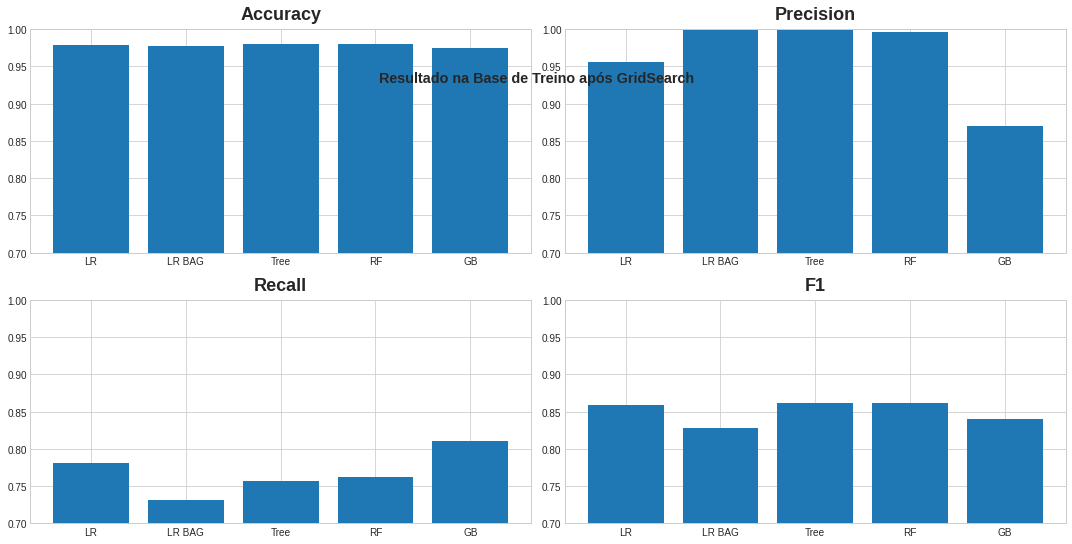

In [ ]:
plt.figure(figsize=(15,15))
plt.suptitle("Resultado na Base de Treino após GridSearch", size='x-large', y=0.93, weight='bold')

plt.subplot(4, 2, 1) # row 1, col 1 index 1
plt.bar(x=score_gs_train_df.index, height=score_gs_train_df['Accuracy'])
plt.title("Accuracy")
plt.ylim([0.7, 1])

plt.subplot(4, 2, 4) # row 4, col 1 index 1
plt.bar(x=score_gs_train_df.index, height=score_gs_train_df['F1'])
plt.title("F1")
plt.ylim([0.7, 1])

plt.subplot(4, 2, 2) # row 2, col 1 index 1
plt.bar(x=score_gs_train_df.index, height=score_gs_train_df['Precision'])
plt.title("Precision")
plt.ylim([0.7, 1])

plt.subplot(4, 2, 3) # row 3, col 1 index 1
plt.bar(x=score_gs_train_df.index, height=score_gs_train_df['Recall'])
plt.title("Recall")
plt.ylim([0.7, 1])

plt.show()

**Resultado na Base de Teste após o GridSearch**

In [ ]:
#Score com validação cruzada 5 fold na base de teste após o GridSearch
score_gs_test_lr = resumo_xval_score(lr, default_X_test_prep, default_Y_test, 5)
score_gs_test_bag_lr_2 = resumo_xval_score(bag_lr_2, default_X_test_prep, default_Y_test, 5)
score_gs_test_tree_clf_3 = resumo_xval_score(tree_clf3, default_X_test_prep, default_Y_test, 5)
score_gs_test_rndf_clf_2 = resumo_xval_score(rndf_clf_2, default_X_test_prep, default_Y_test, 5)
score_gs_test_gd_clf_2 = resumo_xval_score(gb_clf_2, default_X_test_prep, default_Y_test, 5)

In [ ]:
#DataFrame com todos os resultados no conjunto de testes após o GridSearch
score_gs_test_df = pd.DataFrame(
    np.array([score_gs_test_lr, score_gs_test_bag_lr_2, score_gs_test_tree_clf_3, score_gs_test_rndf_clf_2, score_gs_test_gd_clf_2]),
    index=['LR', 'LR BAG', 'Tree', 'RF', 'GB'],
    columns=['Accuracy', 'Precision', 'Recall', 'F1']
    )
score_gs_test_df

,Accuracy,Precision,Recall,F1
LR,0.979240,0.948913,0.782617,0.856711
LR BAG,0.978471,1.000000,0.741389,0.838588
Tree,0.981217,1.000000,0.764733,0.865784
RF,0.981986,0.990991,0.772981,0.867171
GB,0.973198,0.844585,0.819773,0.828386


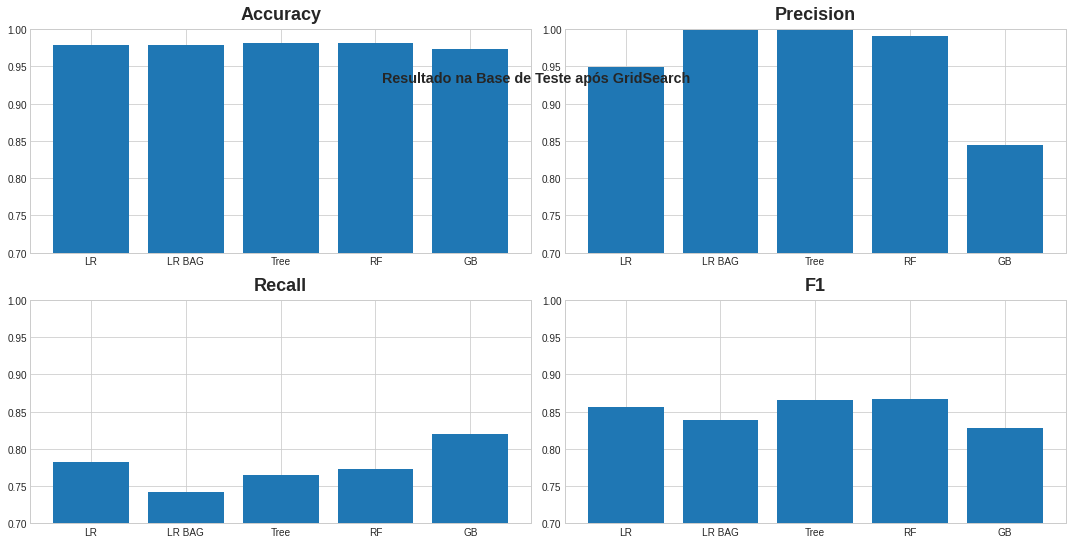

In [ ]:
plt.figure(figsize=(15,15))
plt.suptitle("Resultado na Base de Teste após GridSearch", size='x-large', y=0.93, weight='bold')

plt.subplot(4, 2, 1) # row 1, col 1 index 1
plt.bar(x=score_gs_test_df.index, height=score_gs_test_df['Accuracy'])
plt.title("Accuracy")
plt.ylim([0.7, 1])

plt.subplot(4, 2, 4) # row 4, col 1 index 1
plt.bar(x=score_gs_test_df.index, height=score_gs_test_df['F1'])
plt.title("F1")
plt.ylim([0.7, 1])

plt.subplot(4, 2, 2) # row 2, col 1 index 1
plt.bar(x=score_gs_test_df.index, height=score_gs_test_df['Precision'])
plt.title("Precision")
plt.ylim([0.7, 1])

plt.subplot(4, 2, 3) # row 3, col 1 index 1
plt.bar(x=score_gs_test_df.index, height=score_gs_test_df['Recall'])
plt.title("Recall")
plt.ylim([0.7, 1])

plt.show()

##Curva ROC

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

In [ ]:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(default_Y_test, xpred_test_lr)

In [ ]:
fpr_bag_lr, tpr_bag_lr, thresholds_bag_lr = roc_curve(default_Y_test, cross_pred_test_bag_lr_2)

In [ ]:
fpr_tree, tpr_tree, thresholds_tree = roc_curve(default_Y_test, xpred_test_tree_clf_3)

In [ ]:
fpr_rndf, tpr_rndf, thresholds_rndf = roc_curve(default_Y_test, cross_pred_test_rndf_clf_2)

In [ ]:
fpr_gb, tpr_gb, thresholds_gb = roc_curve(default_Y_test, xpred_test_gb_clf_2)

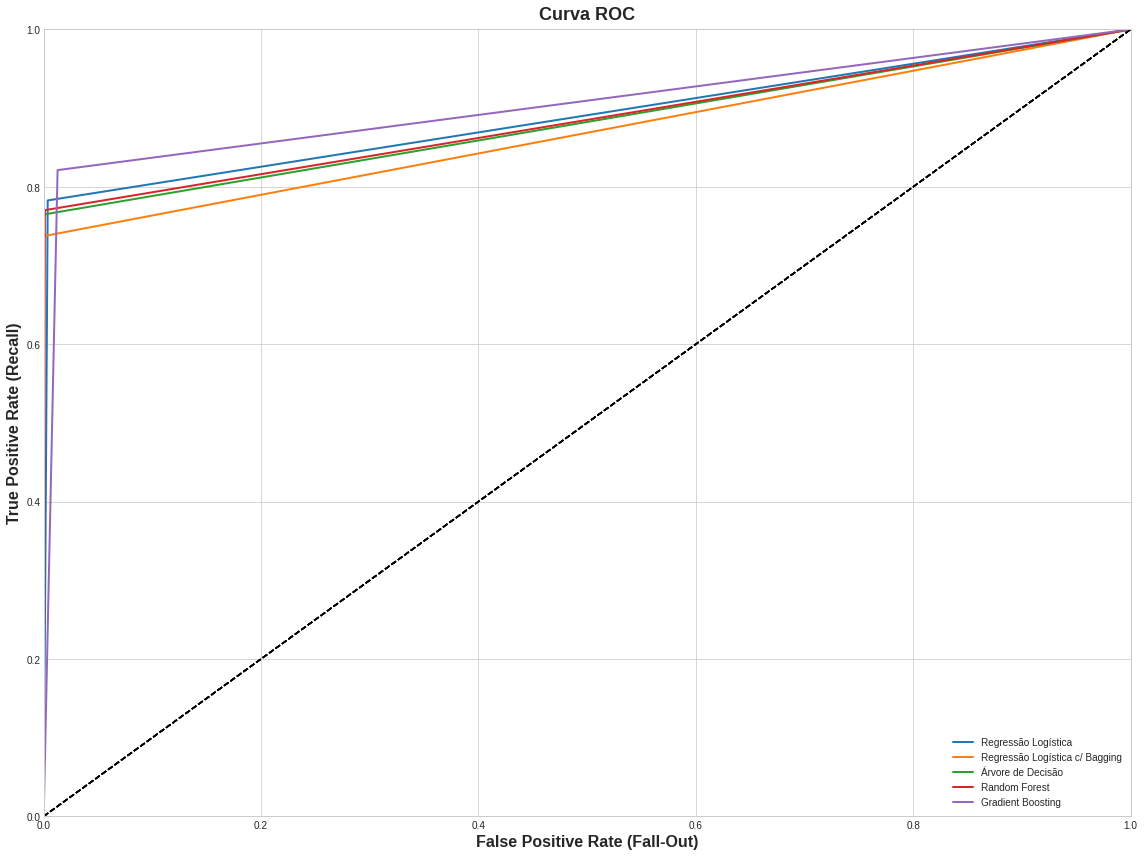

In [ ]:
plt.figure(figsize=(16, 12))                                    # Not shown
plot_roc_curve(fpr_lr, tpr_lr, label='Regressão Logística')
plot_roc_curve(fpr_bag_lr, tpr_bag_lr, label='Regressão Logística c/ Bagging')
plot_roc_curve(fpr_tree, tpr_tree, label='Árvore de Decisão')
plot_roc_curve(fpr_rndf, tpr_rndf, label='Random Forest')
plot_roc_curve(fpr_gb, tpr_gb, label='Gradient Boosting')
plt.legend(loc="lower right")
plt.title('Curva ROC', fontweight="bold")
plt.show()

#Conclusões

Após os tratamentos dos dados e aplicações dos modelos, utilizamos algumas métricas para avaliar seu desempenho. Dentre elas destacamos Acurácia, Precisão, Recall e F1-Score.

Cabe ressaltar que, para análise de default onde o modelo deverá classificar como 0 (não default) e 1 (como defaut) , destacamos a importância da métrica de Recall, pois a mesma, dentre as situações de Classe Positivo, mostra quantas estão corretas. 

Nessa caso entendemos que Falsos Negativos são mais prejudiciais que os Falsos Positivos, pois classificar como não default (0) quando na verdade seria default, pode gerar grande prejuízo para empresa.

Dentre os modelos utilizados, o que apresentou maior Recall foi o Gradient Boosting (82%), ou seja ele detecta 82% dos default (1). Destacamos que este modelo apresentou a pior performance segundo Accuracy, Precision e F1.

Quando olhamos para métrica F1, que é a média harmônica entre precisão e Recall, modelo que melhor desempenha é o de Random Florest, porém ele leva a uma perda do Recall

Buscando um melhor Recall e com maior F1 possível, o modelo de Gradient Boosting alcança F1 considerável com Recall superior aos demais, mantendo um bom nível de precisão dentre os níveis dos demais modelos.

É importante pontuar que os GridSearch foram executados sem a definição do scoring, portanto buscaram otimizar a Accuracy. Um ponto de melhoria seria rodá-los definindo o *scoring* para Recall ou F1.

Além disso, devido ao tempo de processamento e quantidade de modelos, não foi possível explorar mais opções de parâmetros nos GridSearch, o que também pode ser um ponto de melhoria a ser abordado em um estudo subsequente.

In [ ]:
# Setup plotting
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

In [ ]:
model = keras.Sequential([layers.Dense(1024, activation='relu'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(1024, activation='relu'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(1024, activation='relu'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(1),
                         ])

model.compile(optimizer='adam', loss='mae',)

history = model.fit(default_X_prep, default_Y,
                    validation_data=(default_X_test_prep, default_Y_test),
                    batch_size=256,
                    epochs=100,
                    verbose=0,
                   )

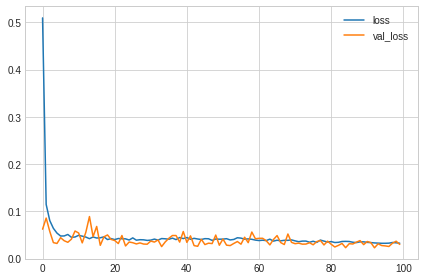

In [ ]:
# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

Minimum validation loss: 0.02053939178586006


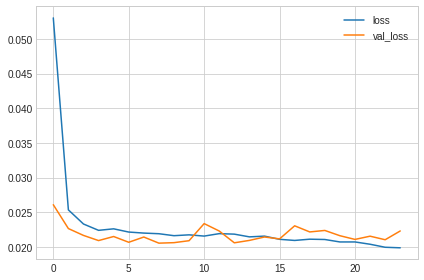

In [ ]:
early_stopping = EarlyStopping(min_delta=0.001, # minimium amount of change to count as an improvement
                               patience=20, # how many epochs to wait before stopping
                               restore_best_weights=True,
                              )

model_stop = keras.Sequential([layers.Dense(512, activation='relu'),
                          layers.Dense(512, activation='relu'),
                          layers.Dense(512, activation='relu'),
                          layers.Dense(1),
                         ])

model_stop.compile(optimizer='adam',loss='mae',)

history2 = model_stop.fit(default_X_prep, default_Y,
                    validation_data=(default_X_test_prep, default_Y_test),
                    batch_size=256,
                    epochs=100,
                    callbacks=[early_stopping],
                    verbose=0,  # turn off training log
                   )

history_df2 = pd.DataFrame(history2.history)
history_df2.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df2['val_loss'].min()))